In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stats

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

def read_and_process(file):
    """Reads a csv file and returns two dataframes"""
    df = pd.read_csv("climate.csv", skiprows=4)
    # Drop the unnamed column
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    # Drop unwanted columns
    df.drop(columns=['Indicator Code', 'Country Code'], inplace=True)
    #df.dropna(axis=1, thresh=len(df) * 0.7, inplace=True)
    # Transform to get countries as columns
    df.set_index(['Country Name', 'Indicator Name'], inplace=True)
    countries_df = df.T.ffill()
    return countries_df, df

def map_corr(df, size=6, cmap='viridis', title=None):
    """Function creates heatmap of correlation matrix for each pair of
    columns in the dataframe.
    Input:
    df: pandas DataFrame
    size: vertical and horizontal size of the plot (in inch)
    """
    # Create a correlation matrix
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size+2, size))
    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)
    im = ax.imshow(corr, cmap=cmap)
    labels = ['Urban pop (%)', 'Population, total', 'Arable land (%)', 'Forest area (%)', 'CO2 emissions (kt)', 
              'Electricity (kWh per capita)']
    # Setting ticks to column names
    plt.xticks(range(len(corr.columns)), labels, rotation=90)
    plt.yticks(range(len(corr.columns)), labels)
    plt.title(title)
    # Add the color bar
    cbar = ax.figure.colorbar(im, ax = ax)
    cbar.ax.set_ylabel("Color bar", rotation = -90, va='center')
    cbar.ax.set_yticks(np.arange(-1, 1.25, 0.25))
    plt.savefig(f'{title}_heatmap.png', bbox_inches='tight', dpi=200)
    
# Calling the main function to read the file
countries_df, years_df = read_and_process('climate.csv')

In [177]:
countries_df

Country Name                                      Aruba                   \
Indicator Name Urban population (% of total population) Urban population   
1960                                             50.776          27728.0   
1961                                             50.761          28330.0   
1962                                             50.746          28764.0   
1963                                             50.730          29157.0   
1964                                             50.715          29505.0   
...                                                 ...              ...   
2018                                             43.411          45999.0   
2019                                             43.546          46351.0   
2020                                             43.697          46574.0   
2021                                             43.866          46734.0   
2022                                             44.052          46891.0   

Country Name                                                         \
Indicator Name Urban population growth (annual %) Population, total   
1960                                          NaN           54608.0   
1961                                     2.147858           55811.0   
1962                                     1.520329           56682.0   
1963                                     1.357042           57475.0   
1964                                     1.186472           58178.0   
...                                           ...               ...   
2018                                     0.765986          105962.0   
2019                                     0.762321          106442.0   
2020                                     0.479958          106585.0   
2021                                     0.342951          106537.0   
2022                                     0.335381          106445.0   

Country Name                                 \
Indicator Name Population growth (annual %)   
1960                                    NaN   
1961                               2.179059   
1962                               1.548572   
1963                               1.389337   
1964                               1.215721   
...                                     ...   
2018                               0.494795   
2019                               0.451970   
2020                               0.134255   
2021                              -0.045045   
2022                              -0.086392   

Country Name                                                                        \
Indicator Name Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)   
1960                                                          NaN                    
1961                                                          NaN                    
1962                                                          NaN                    
1963                                                          NaN                    
1964                                                          NaN                    
...                                                           ...                    
2018                                                          NaN                    
2019                                                          NaN                    
2020                                                          NaN                    
2021                                                          NaN                    
2022                                                          NaN                    

Country Name                                                                      \
Indicator Name Prevalence of underweight, weight for age (% of children under 5)   
1960                                                          NaN                  
1961                                                          NaN                  
1962                

In [147]:
years_df

1960  \
Country Name Indicator Name                                                  
Aruba        Urban population (% of total population)               50.776   
             Urban population                                    27728.000   
             Urban population growth (annual %)                        NaN   
             Population, total                                   54608.000   
             Population growth (annual %)                              NaN   
...                                                                    ...   
Zimbabwe     Rural land area where elevation is below 5 mete...        NaN   
             Rural land area where elevation is below 5 mete...        NaN   
             Arable land (% of land area)                              NaN   
             Agricultural land (% of land area)                        NaN   
             Agricultural land (sq. km)                                NaN   

                                                                          1961  \
Country Name Indicator Name                                                      
Aruba        Urban population (% of total population)                50.761000   
             Urban population                                     28330.000000   
             Urban population growth (annual %)                       2.147858   
             Population, total                                    55811.000000   
             Population growth (annual %)                             2.179059   
...                                                                        ...   
Zimbabwe     Rural land area where elevation is below 5 mete...            NaN   
             Rural land area where elevation is below 5 mete...            NaN   
             Arable land (% of land area)                             4.872690   
             Agricultural land (% of land area)                      28.396019   
             Agricultural land (sq. km)                          109850.000000   

                                                                          1962  \
Country Name Indicator Name                                                      
Aruba        Urban population (% of total population)                50.746000   
             Urban population                                     28764.000000   
             Urban population growth (annual %)                       1.520329   
             Population, total                                    56682.000000   
             Population growth (annual %)                             1.548572   
...                                                                        ...   
Zimbabwe     Rural land area where elevation is below 5 mete...            NaN   
             Rural land area where elevation is below 5 mete...            NaN   
             Arable land (% of land area)                             5.001939   
             Agricultural land (% of land area)                      28.615743   
             Agricultural land (sq. km)                          110700.000000   

                                                                          1963  \
Country Name Indicator Name                                                      
Aruba        Urban population (% of total population)                50.730000   
             Urban population                                     29157.000000   
             Urban population growth (annual %)                       1.357042   
             Population, total                                    57475.000000   
             Population growth (annual %)                             1.389337   
...                                                                        ...   
Zimbabwe     Rural land area where elevation is below 5 mete...            NaN   
             Rural land area where elevation is below 5 mete...            NaN   
             Arable land (% of land area)                             5.131188   
             Agricu

In [198]:
# Statistical Summary
years_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.493000e+03,4.073000e+03,4.107000e+03,4.124000e+03,4.165000e+03,4.197000e+03,4.203000e+03,4.208000e+03,4.219000e+03,4.225000e+03,...,1.138000e+04,1.145100e+04,1.281800e+04,9.864000e+03,8.159000e+03,8.183000e+03,8.349000e+03,8.094000e+03,5.209000e+03,2.738000e+03
mean,2.535271e+07,1.648477e+07,1.714116e+07,1.827208e+07,1.883587e+07,1.955585e+07,2.194452e+07,2.278304e+07,2.439680e+07,2.575188e+07,...,9.254263e+08,1.045854e+09,1.077309e+09,1.264284e+07,1.548883e+07,1.567940e+07,1.559316e+07,1.630838e+07,2.549778e+07,4.874824e+07
std,1.977376e+08,1.666872e+08,1.761028e+08,1.925344e+08,2.002914e+08,2.110774e+08,2.510258e+08,2.614987e+08,2.881369e+08,3.094322e+08,...,2.251517e+10,2.529007e+10,2.735999e+10,1.838175e+08,2.048315e+08,2.072754e+08,2.078638e+08,2.136967e+08,2.689116e+08,3.731501e+08
min,-3.667000e+00,-3.667000e+00,-3.667000e+00,-3.703670e+02,-3.667000e+00,-2.354033e+00,-3.667000e+00,-2.829547e+00,-7.260660e+02,-4.787105e+00,...,-4.542582e+05,-6.116137e+05,-6.381096e+05,-7.114856e+05,-4.165099e+01,-1.303109e+03,-1.167811e+01,-1.040598e+02,-1.174194e+02,-3.914367e+02
25%,4.081633e+00,3.566522e+00,3.667000e+00,3.667000e+00,3.667000e+00,3.667000e+00,3.667000e+00,3.641052e+00,3.667000e+00,3.667000e+00,...,1.816634e+00,1.925110e+00,1.060360e+00,2.040274e+00,2.177752e+00,2.116726e+00,2.301175e+00,2.063995e+00,3.706017e+00,1.992264e+00
50%,5.717916e+01,4.300000e+01,4.350413e+01,4.335072e+01,4.326596e+01,4.266595e+01,4.280000e+01,4.292857e+01,4.276503e+01,4.392176e+01,...,3.021300e+01,3.012682e+01,1.725243e+01,2.633235e+01,2.259756e+01,2.237828e+01,2.392509e+01,2.303527e+01,2.530361e+01,1.260826e+01
75%,2.008500e+04,2.298511e+03,2.343773e+03,2.350000e+03,2.349084e+03,2.348000e+03,2.405849e+03,2.484794e+03,2.542628e+03,2.702000e+03,...,1.453775e+03,1.441201e+03,5.010592e+02,1.576410e+03,1.194933e+03,1.163999e+03,9.633500e+02,1.281901e+03,1.000000e+02,8.130350e+01
max,3.040000e+09,3.428000e+09,3.797000e+09,4.362000e+09,4.653000e+09,4.998000e+09,6.127000e+09,6.387000e+09,7.203000e+09,7.830000e+09,...,1.267134e+12,1.435701e+12,1.644540e+12,7.492157e+09,7.578221e+09,7.661777e+09,7.742682e+09,7.820964e+09,7.888161e+09,7.951150e+09


In [468]:
# Describe
countries_of_interest = countries_df[['Canada','India', 'China', 'United States', 'European Union']]
indicators_of_interest = ['Urban population (% of total population)', 'Population, total','Arable land (% of land area)', 
                          'Forest area (% of land area)', 'CO2 emissions (kt)', 'Electric power consumption (kWh per capita)']
countries_of_interest.describe()

Country Name                                     Canada                   \
Indicator Name Urban population (% of total population) Urban population   
count                                         63.000000     6.300000e+01   
mean                                          77.417587     2.188325e+07   
std                                            3.184706     5.431796e+06   
min                                           69.061000     1.236838e+07   
25%                                           75.658500     1.760209e+07   
50%                                           76.620000     2.148227e+07   
75%                                           80.304500     2.628389e+07   
max                                           81.752000     3.182597e+07   

Country Name                                                         \
Indicator Name Urban population growth (annual %) Population, total   
count                                   62.000000      6.300000e+01   
mean                                     1.524419      2.803687e+07   
std                                      0.629834      5.923729e+06   
min                                      0.686929      1.790936e+07   
25%                                      1.172165      2.329654e+07   
50%                                      1.313955      2.803742e+07   
75%                                      1.518284      3.273010e+07   
max                                      3.522847      3.892990e+07   

Country Name                                 \
Indicator Name Population growth (annual %)   
count                             62.000000   
mean                               1.252322   
std                                0.389759   
min                                0.575422   
25%                                0.994394   
50%                                1.137053   
75%                                1.397379   
max                                2.948195   

Country Name                                                                        \
Indicator Name Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)   
count                                                   52.000000                    
mean                                                     0.665385                    
std                                                      0.561819                    
min                                                      0.200000                    
25%                                                      0.200000                    
50%                                                      0.500000                    
75%                                                      1.200000                    
max                                                      2.200000                    

Country Name                                                                      \
Indicator Name Prevalence of underweight, weight for age (% of children under 5)   
count                                                         0.0                  
mean                                                          NaN                  
std                                                           NaN                  
min                                                           NaN                  
25%                                                           NaN                  
50%                                                           NaN                  
75%                                                           NaN                  
max                                                           NaN                  

Country Name                                                \
Indicator Name Community health workers (per 1,000 people)   
count                                                  0.0   
mean                                                   NaN   
std                                                    NaN   
min                                          

In [260]:
# Skewness
skewness = stats.skew(countries_of_interest.loc['1965':'2022']['China']['Population growth (annual %)'])
skewness

0.6961441280865117

In [262]:
# Kurtosis
kurtosis = stats.kurtosis(countries_of_interest.loc['1965':'2022']['China']['Population growth (annual %)'])
kurtosis

-0.3815395143386664

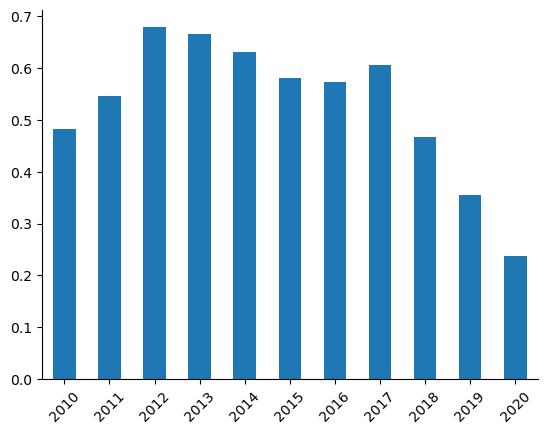

In [284]:
china_df = countries_of_interest.loc['2010':'2020']['China']['Population growth (annual %)']
ax = china_df.plot(kind='bar', rot=45)


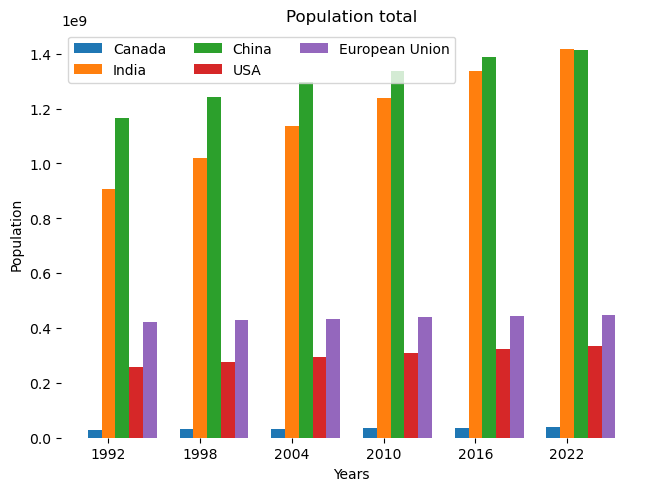

In [629]:
# Population, total bar plot
canada_pop = countries_of_interest.loc['1992':'2023':6]['Canada']['Population, total']
india_pop = countries_of_interest.loc['1992':'2023':6]['India']['Population, total']
china_pop = countries_of_interest.loc['1992':'2023':6]['China']['Population, total']
us_pop = countries_of_interest.loc['1992':'2023':6]['United States']['Population, total']
eu_pop = countries_of_interest.loc['1992':'2023':6]['European Union']['Population, total']
bar_df = {'Canada': canada_pop, 'India': india_pop, 'China': china_pop, 'USA': us_pop, 'European Union': eu_pop}

fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(np.arange(1992, 2023, 6)))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for attribute, measurement in bar_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
ax.set_ylabel('Population')
ax.set_xlabel('Years')
#ax.set_yscale('log')
ax.set_title('Population total')
ax.set_xticks(x + width, np.arange(1992, 2023, 6))
ax.legend(loc='upper left', ncols=3)
plt.savefig('Pop_bar.png')
plt.show() 

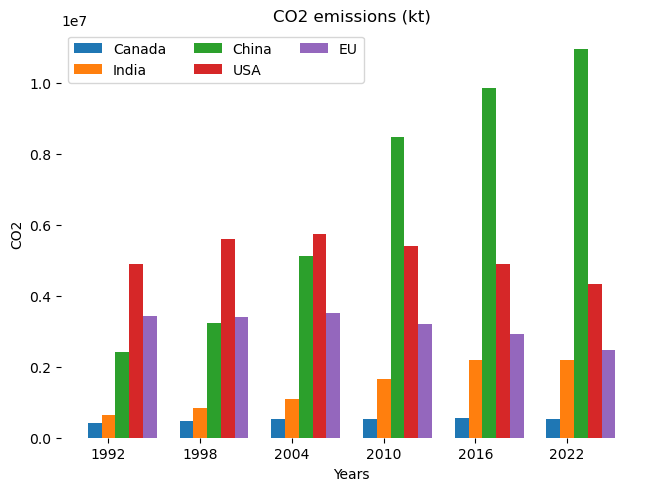

In [630]:
# CO2 emissions bar plot
canada_pop = countries_of_interest.loc['1992':'2023':6]['Canada']['CO2 emissions (kt)']
india_pop = countries_of_interest.loc['1992':'2023':6]['India']['CO2 emissions (kt)']
china_pop = countries_of_interest.loc['1992':'2023':6]['China']['CO2 emissions (kt)']
us_pop = countries_of_interest.loc['1992':'2023':6]['United States']['CO2 emissions (kt)']
eu_pop = countries_of_interest.loc['1992':'2023':6]['European Union']['CO2 emissions (kt)']
bar_df = {'Canada': canada_pop, 'India': india_pop, 'China': china_pop, 'USA': us_pop, 'EU': eu_pop}

fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(np.arange(1992, 2023, 6)))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for attribute, measurement in bar_df.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1
ax.set_ylabel('CO2')
ax.set_xlabel('Years')
#ax.set_yscale('log')
ax.set_title('CO2 emissions (kt)')
ax.set_xticks(x + width, np.arange(1992, 2023, 6))
ax.legend(loc='upper left', ncols=3)
plt.savefig('CO2_bar.png')
plt.show()

In [516]:
# Correlation heatmap for China
china_df = countries_of_interest.loc['1992':'2022']['China'][['Urban population (% of total population)', 
                                                              'Population, total','Arable land (% of land area)', 
                                                              'Forest area (% of land area)', 'CO2 emissions (kt)', 
                                                              'Electric power consumption (kWh per capita)']]
china_df

Indicator Name,Urban population (% of total population),"Population, total",Arable land (% of land area),Forest area (% of land area),CO2 emissions (kt),Electric power consumption (kWh per capita)
1992,28.200,1.164970e+09,13.090832,17.161088,2418175.3,604.693683
1993,29.103,1.178440e+09,12.920406,17.372628,2645411.7,662.637046
1994,30.024,1.191835e+09,12.856496,17.584169,2767666.4,727.107360
1995,30.961,1.204855e+09,12.737212,17.795728,3088620.2,770.280241
1996,31.916,1.217550e+09,12.711555,18.007288,3070505.1,821.080859
1997,32.883,1.230075e+09,12.679627,18.218830,3134112.6,852.740687
1998,33.867,1.241935e+09,12.679653,18.430371,3236278.6,870.617222
1999,34.865,1.252735e+09,12.679680,18.641912,3153661.1,913.963448
2000,35.877,1.262645e+09,12.679720,18.853473,3346525.8,992.943385
2001,37.093,1.271850e+09,12.742982,19.104968,3529081.3,1076.549121


In [624]:
china_df.corr()

Indicator Name,Urban population (% of total population),"Population, total",Arable land (% of land area),Forest area (% of land area),CO2 emissions (kt),Electric power consumption (kWh per capita)
Indicator Name,,,,,,
Urban population (% of total population),1.000000,0.987377,-0.824537,0.998785,0.983122,0.977055
"Population, total",0.987377,1.000000,-0.780707,0.993053,0.961318,0.956396
Arable land (% of land area),-0.824537,-0.780707,1.000000,-0.804093,-0.766121,-0.768003
Forest area (% of land area),0.998785,0.993053,-0.804093,1.000000,0.982158,0.975821
CO2 emissions (kt),0.983122,0.961318,-0.766121,0.982158,1.000000,0.995428
Electric power consumption (kWh per capita),0.977055,0.956396,-0.768003,0.975821,0.995428,1.000000


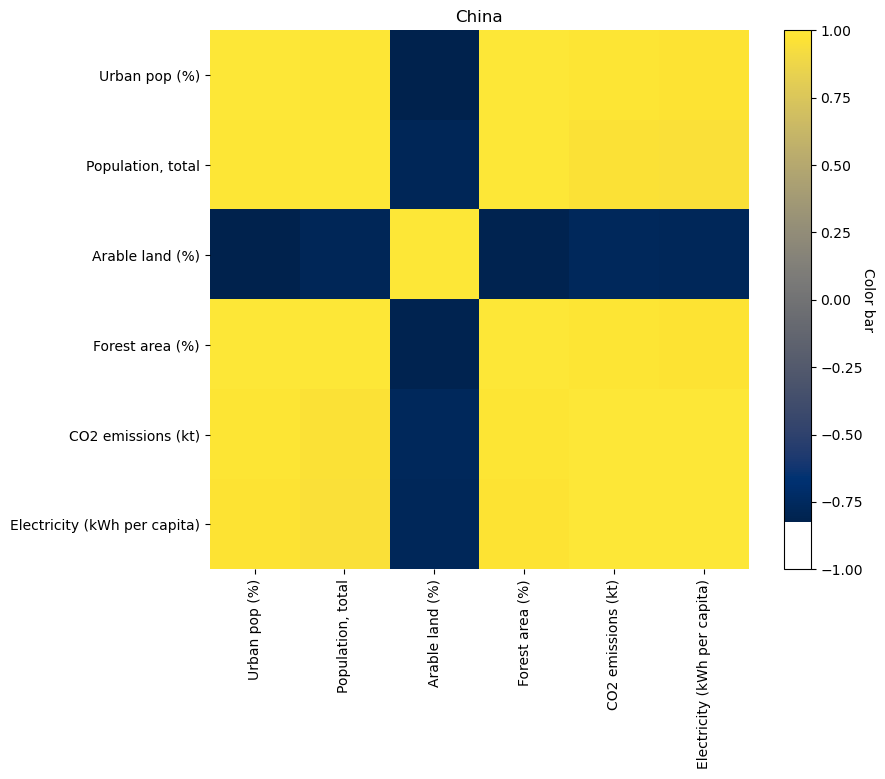

In [625]:
map_corr(china_df, 7, 'cividis', 'China')

In [457]:
# Correlation heatmap for EU
eu_df = countries_of_interest.loc['1992':'2022']['European Union'][indicators_of_interest]
# Create a correlation
eu_df.corr()

Indicator Name,Urban population (% of total population),"Population, total",Arable land (% of land area),Forest area (% of land area),CO2 emissions (kt),Electric power consumption (kWh per capita)
Indicator Name,,,,,,
Urban population (% of total population),1.000000,0.938279,-0.913386,0.977301,-0.907892,-0.635564
"Population, total",0.938279,1.000000,-0.956653,0.983217,-0.777226,-0.794417
Arable land (% of land area),-0.913386,-0.956653,1.000000,-0.954108,0.791298,0.793323
Forest area (% of land area),0.977301,0.983217,-0.954108,1.000000,-0.852460,-0.746392
CO2 emissions (kt),-0.907892,-0.777226,0.791298,-0.852460,1.000000,0.539643
Electric power consumption (kWh per capita),-0.635564,-0.794417,0.793323,-0.746392,0.539643,1.000000


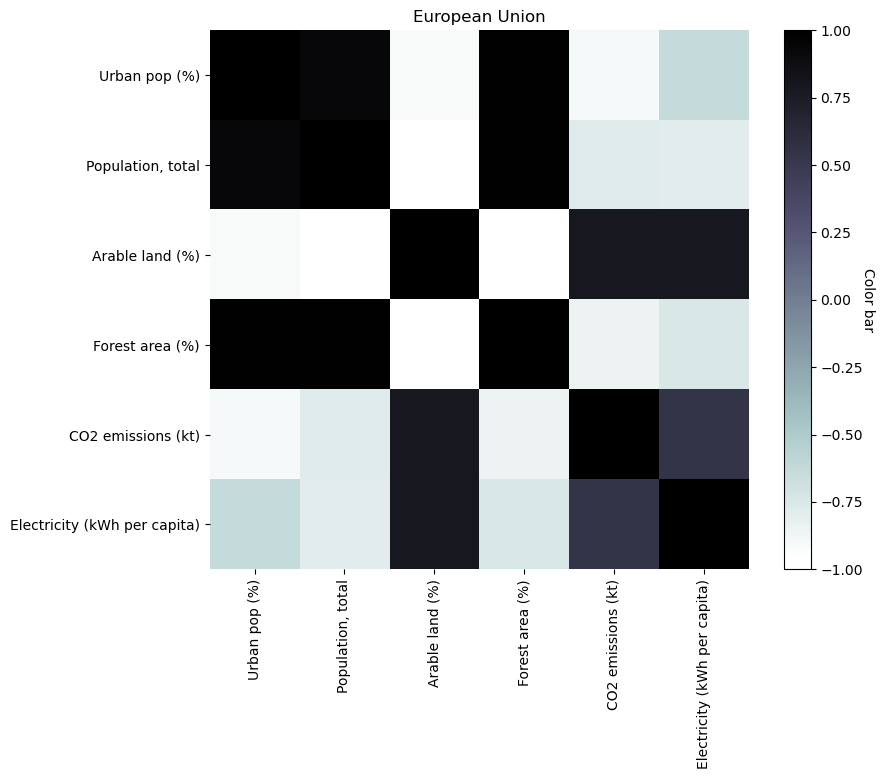

In [616]:
map_corr(eu_df, 7, 'bone_r', 'European Union')

In [502]:
# Correlation heat map for United States
us_df = countries_of_interest.loc['1992':'2023']['United States'][indicators_of_interest]
us_df.corr()

Indicator Name,Urban population (% of total population),"Population, total",Arable land (% of land area),Forest area (% of land area),CO2 emissions (kt),Electric power consumption (kWh per capita)
Indicator Name,,,,,,
Urban population (% of total population),1.000000,0.994126,-0.938063,0.939319,-0.461610,0.374198
"Population, total",0.994126,1.000000,-0.953840,0.968831,-0.517242,0.304676
Arable land (% of land area),-0.938063,-0.953840,1.000000,-0.973385,0.376474,-0.378888
Forest area (% of land area),0.939319,0.968831,-0.973385,1.000000,-0.553037,0.193609
CO2 emissions (kt),-0.461610,-0.517242,0.376474,-0.553037,1.000000,0.562588
Electric power consumption (kWh per capita),0.374198,0.304676,-0.378888,0.193609,0.562588,1.000000


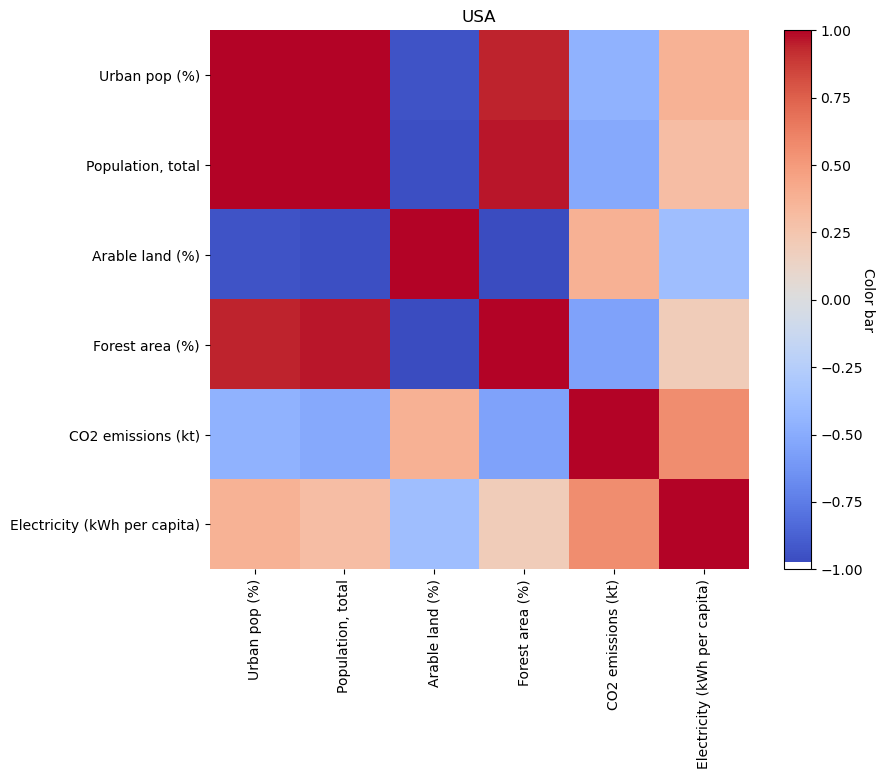

In [615]:
map_corr(us_df, 7, 'coolwarm', 'USA')

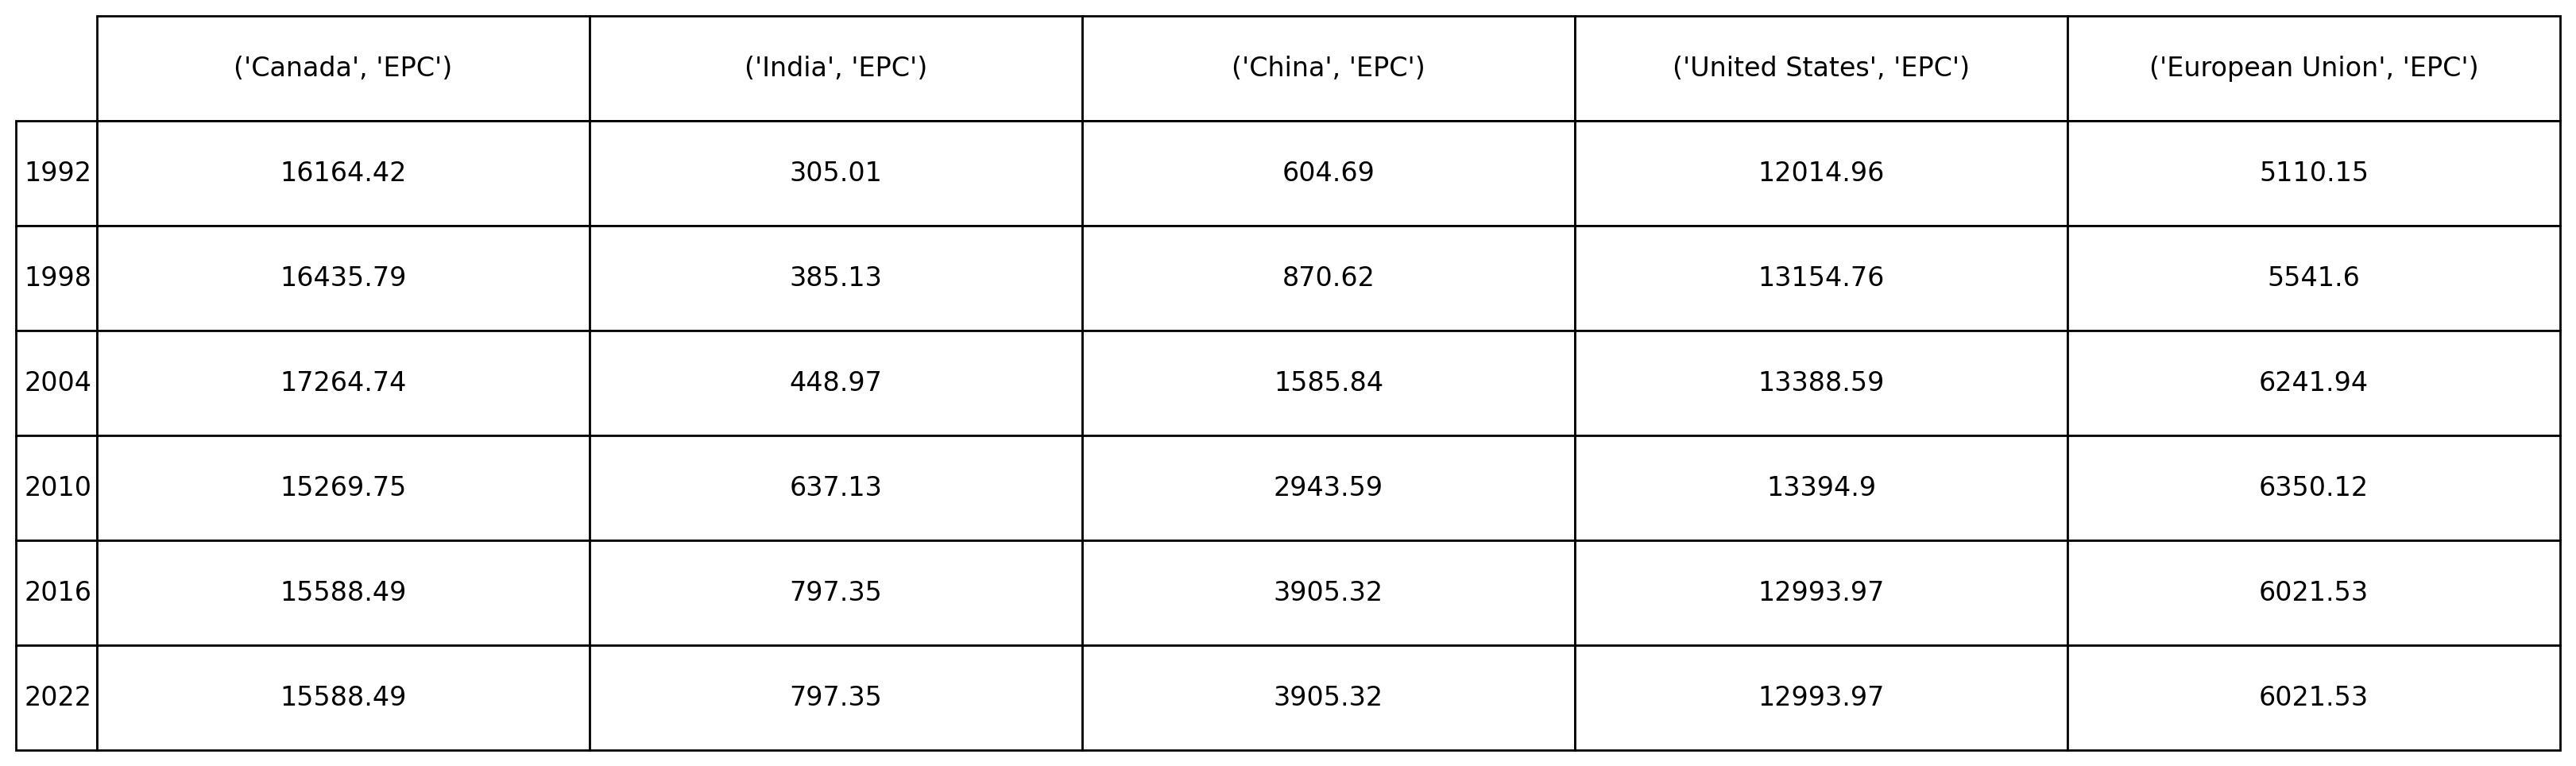

In [619]:
# Table for Electric power consumption
ec_df = countries_of_interest.xs('Electric power consumption (kWh per capita)', level='Indicator Name', axis=1, 
                                 drop_level=False).loc['1992':'2022':6]
ec_df.rename(columns={'Electric power consumption (kWh per capita)': 'EPC'}, inplace=True)
ec_df = ec_df.round(2)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6), dpi=200)
fig

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=ec_df.values, rowLabels=ec_df.index, colLabels=ec_df.columns, cellLoc='center', loc='center',
                colWidths=[0.07 for x in columns], bbox=[0,0,1,1])
table.auto_set_font_size(False) 
table.set_fontsize(12)
# Save the table as an image
plt.savefig('urban_population_table.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

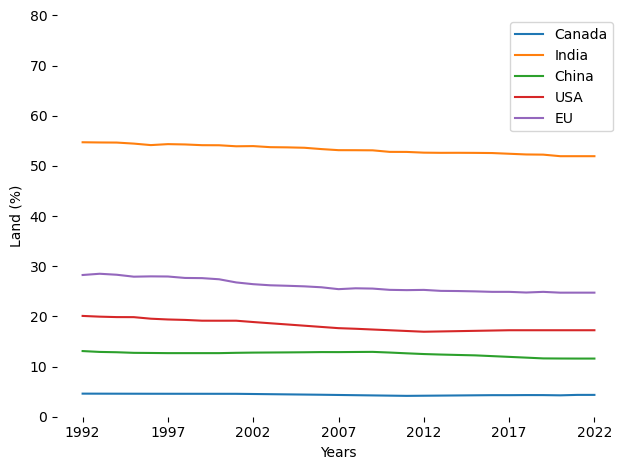

In [597]:
# Arable land % plot
arable_df = countries_of_interest.xs('Arable land (% of land area)', level='Indicator Name', axis=1,
                                     drop_level=False).loc['1992':'2022']
arable_df
arable_df.plot()
plt.legend(labels= ['Canada', 'India', 'China', 'USA', 'EU'])
plt.ylim(0, 80)
plt.xlabel('Years')
plt.ylabel('Land (%)')
plt.tight_layout()
plt.savefig('arable.png')

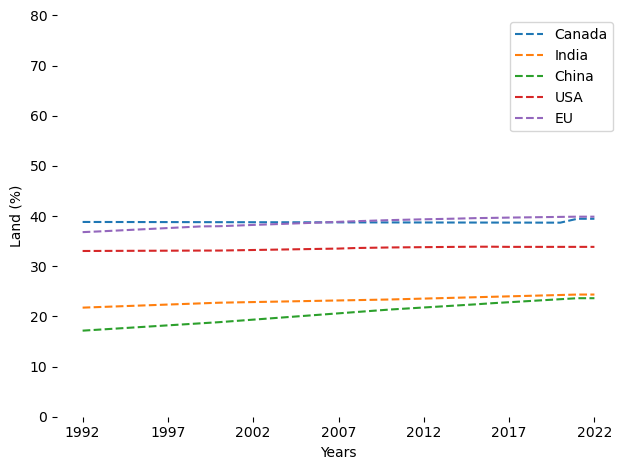

In [596]:
# Forest area % plot
forest_df = countries_of_interest.xs('Forest area (% of land area)', level='Indicator Name', axis=1,
                                     drop_level=False).loc['1992':'2022']
forest_df
forest_df.plot(style='--')
plt.legend(labels= ['Canada', 'India', 'China', 'USA', 'EU'])
plt.ylim(0, 80)
plt.xlabel('Years')
plt.ylabel('Land (%)')
plt.tight_layout()
plt.savefig('forest_area.png')

In [622]:
eu_df.corr()

Indicator Name,Urban population (% of total population),"Population, total",Arable land (% of land area),Forest area (% of land area),CO2 emissions (kt),Electric power consumption (kWh per capita)
Indicator Name,,,,,,
Urban population (% of total population),1.000000,0.938279,-0.913386,0.977301,-0.907892,-0.635564
"Population, total",0.938279,1.000000,-0.956653,0.983217,-0.777226,-0.794417
Arable land (% of land area),-0.913386,-0.956653,1.000000,-0.954108,0.791298,0.793323
Forest area (% of land area),0.977301,0.983217,-0.954108,1.000000,-0.852460,-0.746392
CO2 emissions (kt),-0.907892,-0.777226,0.791298,-0.852460,1.000000,0.539643
Electric power consumption (kWh per capita),-0.635564,-0.794417,0.793323,-0.746392,0.539643,1.000000
